In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
df =pd.read_csv('wine.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good/bad
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,bad
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,bad
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,bad
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,bad
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,bad


In [ ]:
df["target"] = df["quality"].map({0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 1, 8: 1, 9: 1, 10: 1})

In [ ]:
if df.isnull().values.any ():
    print (f"NaN values found")
else:
    print (f"No NaN values found")

No NaN values found


In [ ]:

for i in range (3, 11):
    print (f"Quality: {i}, Number in Group: {len (df[df.quality == i])}")

Quality: 3, Number in Group: 30
Quality: 4, Number in Group: 214
Quality: 5, Number in Group: 2128
Quality: 6, Number in Group: 2820
Quality: 7, Number in Group: 1074
Quality: 8, Number in Group: 192
Quality: 9, Number in Group: 5
Quality: 10, Number in Group: 0


<Axes: xlabel='quality', ylabel='count'>

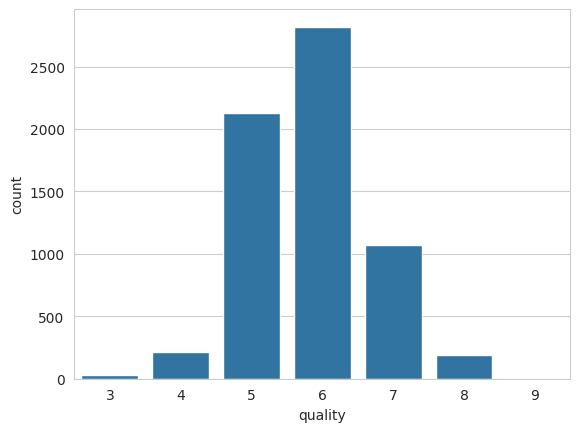

In [ ]:
sns.set_style("whitegrid")
sns.countplot(data = df, x = "quality")


In [ ]:
df.drop(["type",'good/bad'],axis = 1,inplace = True)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


In [ ]:
# Step 4. For each feature determine if any data instance is an outlier;
# if it is delete that data instance

for feature in df:
    f = df[feature].values
    # print(f)
    # print()
    mean = np.mean(f)
    std = np.std(f)
    count = 0
    for i in range (0, len(f)):
        z = (f[i] - mean) / std
        if (z > 5):
            count = count + 1
            if(i in f): df = df.drop([i])
    print(f"Number of data instances dropped from {feature} is {count}")

Number of data instances dropped from fixed acidity is 11
Number of data instances dropped from volatile acidity is 6
Number of data instances dropped from citric acid is 2
Number of data instances dropped from residual sugar is 3
Number of data instances dropped from chlorides is 38
Number of data instances dropped from free sulfur dioxide is 7
Number of data instances dropped from total sulfur dioxide is 1
Number of data instances dropped from density is 3
Number of data instances dropped from pH is 0
Number of data instances dropped from sulphates is 16
Number of data instances dropped from alcohol is 0
Number of data instances dropped from quality is 0
Number of data instances dropped from target is 0


In [ ]:
df_mod = df.drop(["quality", "target"], axis = 1)
X = df_mod.values
Y = df["target"].to_numpy()

print (f"X = {len(X[1])} features * {len(X)} entries")
print (f"Y = {len(Y)} data entries")

X = 11 features * 6463 entries
Y = 6463 data entries


In [ ]:
from sklearn.model_selection import train_test_split
(X_train, X_test, Y_train, Y_test) = train_test_split (X, Y, test_size = 0.2)

print (f"Training: {len(X_train)}, Testing: {len(X_test)}")

Training: 5170, Testing: 1293


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit (X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression (solver = "lbfgs")
lr.fit (X_test, Y_test)

percent = round(100 * lr.score(X_test, Y_test), 2)
print (f"Logistic Regression accuracy is {percent}%")

Logistic Regression accuracy is 81.9%


In [ ]:

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier (max_iter = 300, solver = "adam")
mlp.fit (X_train, Y_train)
ann_percent = round (100 * mlp.score (X_test, Y_test), 2)

print (f"ANN Accuracy is {ann_percent}%")

ANN Accuracy is 84.3%


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Minimum error:- 0.14617169373549885 at K = 1


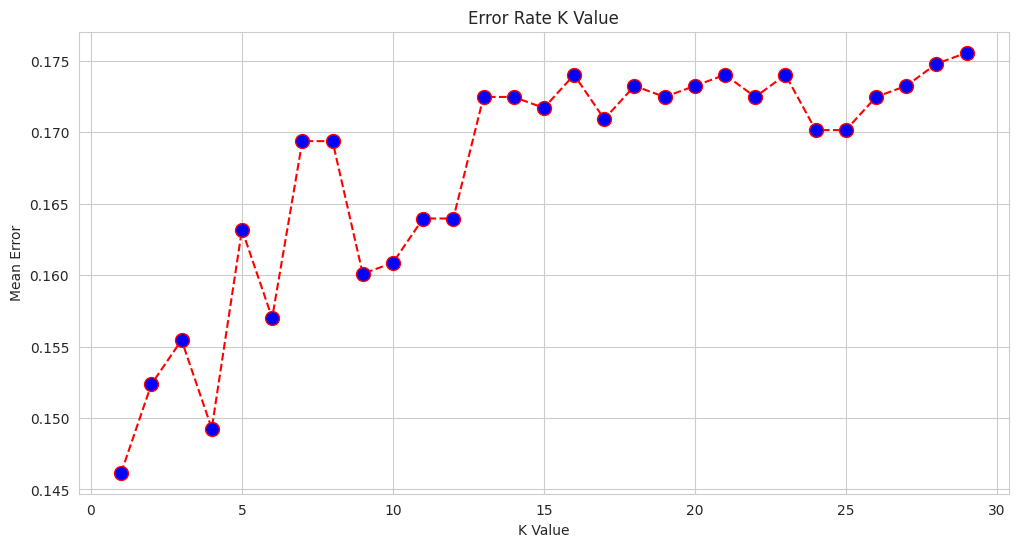

In [ ]:
error = []
# Calculating error for K values between 1 and 30
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != Y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
print("Minimum error:-",min(error),"at K =",error.index(min(error))+1)

In [ ]:
classifier= KNeighborsClassifier(n_neighbors=1)
classifier.fit(X_train, Y_train)
y_pred= classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(Y_test, y_pred)
accuracy_score(Y_test, y_pred)

0.8538283062645011

In [ ]:
# Step 10. Create kNN classifier and see what value of k is best

from sklearn.neighbors import KNeighborsClassifier
max = 0
rng = list(range(1, 21))
for i in (rng):
    knni = KNeighborsClassifier (n_neighbors= i)
    knni.fit (X_train, Y_train)
    knni_percent = round (100 * knni.score (X_train, Y_train), 2)
    print (f"Nearest neighbor {i}, Quality = {knni_percent}%")
    if (knni_percent > max):
        max = knni_percent
        index = i
print (f"kNN algorithm with {index} nearest neighbor has a percent accuracy of {max}%")

Nearest neighbor 1, Quality = 100.0%
Nearest neighbor 2, Quality = 93.23%
Nearest neighbor 3, Quality = 92.05%
Nearest neighbor 4, Quality = 89.38%
Nearest neighbor 5, Quality = 88.88%
Nearest neighbor 6, Quality = 88.28%
Nearest neighbor 7, Quality = 87.76%
Nearest neighbor 8, Quality = 87.39%
Nearest neighbor 9, Quality = 86.89%
Nearest neighbor 10, Quality = 86.92%
Nearest neighbor 11, Quality = 86.09%
Nearest neighbor 12, Quality = 86.02%
Nearest neighbor 13, Quality = 86.05%
Nearest neighbor 14, Quality = 85.76%
Nearest neighbor 15, Quality = 85.76%
Nearest neighbor 16, Quality = 85.42%
Nearest neighbor 17, Quality = 85.3%
Nearest neighbor 18, Quality = 85.15%
Nearest neighbor 19, Quality = 85.15%
Nearest neighbor 20, Quality = 85.28%
kNN algorithm with 1 nearest neighbor has a percent accuracy of 100.0%


In [ ]:
# x= df.iloc[:,0:13].values
# y= df['target'].values
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)
# from sklearn.preprocessing import StandardScaler
# st_x= StandardScaler()
# x_train= st_x.fit_transform(x_train)
# x_test= st_x.transform(x_test)

In [ ]:
# classifier= KNeighborsClassifier(n_neighbors=7)
# classifier.fit(x_train, y_train)
# y_pred= classifier.predict(x_test)
# from sklearn.metrics import confusion_matrix
# cm= confusion_matrix(y_test, y_pred)

In [ ]:
# accuracy_score(y_test, y_pred)

1.0